# <p style="color:#FF69B4;"> ✨ Limpeza dos Dados ✨ </p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

In [2]:

arquivo = "TA_MONOGRAFIA_AGROTOXICO.csv"
df = pd.read_csv(arquivo, encoding="latin1", sep=";")

df.columns = df.columns.str.strip()          
df = df.drop_duplicates()                    
df = df.dropna(axis=1, thresh=len(df)*0.5)

df = df.drop(columns=[
    "NO_SUBSTANCIA", 
    "TIPO_LIMITE", 
    "NO_VALOR_REFERENCIA", 
    "DS_ATO_LEGAL",
    "CO_MONOGRAFIA",
    "NU_CAS",
    "DT_ATUALIZACAO"   
], errors="ignore")   

df = df.map(lambda x: x.lower() if isinstance(x, str) else x)

df.to_csv("TA_MONOGRAFIA_AGROTOXICO_limpo.csv", index=False, encoding="utf-8-sig")

df.head()


,TP_SUBSTANCIA,NU_LMR,DS_INGREDIENTE_ATIVO,ST_AUTORIZADO,NO_CULTURA,NO_UNIDADE_MEDIDA,DT_INICIO_VIGENCIA
0,quimico,0.05,abamectina,sim,ameixa,miligrama/kilograma,11/01/2024 00:00:00
1,quimico,0.70,abamectina,sim,mirtilo,miligrama/kilograma,11/01/2024 00:00:00
2,quimico,0.01,abamectina,sim,pepino,miligrama/kilograma,09/02/2003 00:00:00
3,quimico,20.00,azoxistrobina,sim,rúcula,miligrama/kilograma,02/22/2023 00:00:00
4,quimico,0.40,azoxistrobina,sim,salsa,miligrama/kilograma,12/28/2022 00:00:00


# <p style="color:#FF69B4;"> ✨ Pergunta da Pesquisa ✨ </p>

**<p style="color:#FFB6C1;">Qual é o perfil de toxicidade e os riscos associados dos agrotóxicos aprovados no Brasil, 
como os ingredientes ativos são distribuídos entre diferentes culturas agrícolas 
e quais padrões de reavaliação e status regulatório emergem ao longo do tempo?**</p>

# <p style="color:#FF69B4;"> ✨ Hipóteses ✨ </p>

**<p style="color:#FFB6C1;">Hipótese Top-Down:   
Culturas de maior relevância econômica, como soja e milho, concentram ingredientes ativos mais utilizados e podem apresentar maior diversidade de substâncias, o que leva a uma maior complexidade regulatória.**</p>

**<p style="color:#FFB6C1;">Hipótese Bottom-Up:   
Explorando os dados, esperamos que ingredientes mais presentes apareçam repetidamente em várias culturas, principalmente naquelas com mais registro de agrotóxicos, sugerindo padrões de uso específicos que podem indicar riscos concentrados ou foco regulatório.**

**<p style="color:#FFB6C1;">Hipótese Bottom-Up:   
Com base na visualização de um outlier, esperamos que culturas alimentícias tenham limites máximos de resíduos (LMR) mais restritivos do que culturas não alimentícias.**</p>

**<p style="color:#FFB6C1;">Hipótese Bottom-Up:   
Explorando os dados, nota-se que o mercado brasileiro de agrotóxicos é dominado por produtos químicos, não havendo registros de produtos biológicos na base analisada.**</p>

# <p style="color:#FF69B4;"> ✨ Fase Exploratória ✨ </p>

In [3]:
print("Informações gerais do dataset:")
df.info()

print("\nDescrição estatística:")
print(df.describe(include='all'))

Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9402 entries, 0 to 9401
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TP_SUBSTANCIA         9402 non-null   object 
 1   NU_LMR                9402 non-null   float64
 2   DS_INGREDIENTE_ATIVO  9401 non-null   object 
 3   ST_AUTORIZADO         9401 non-null   object 
 4   NO_CULTURA            9401 non-null   object 
 5   NO_UNIDADE_MEDIDA     9401 non-null   object 
 6   DT_INICIO_VIGENCIA    9401 non-null   object 
dtypes: float64(1), object(6)
memory usage: 514.3+ KB

Descrição estatística:
       TP_SUBSTANCIA       NU_LMR DS_INGREDIENTE_ATIVO ST_AUTORIZADO  \
count           9402  9402.000000                 9401          9401   
unique             1          NaN                  385             2   
top          quimico          NaN        difenoconazol           sim   
freq            9402          NaN     

In [4]:
print("--- Análise das Variáveis Categóricas Chave ---\n")

print("As 10 culturas com mais registros:")
print(df['NO_CULTURA'].value_counts().head(10))

print("\nOs 10 ingredientes ativos mais frequentes:")
print(df['DS_INGREDIENTE_ATIVO'].value_counts().head(10))

print("\nContagem de status (autorizado ou não):")
print(df['ST_AUTORIZADO'].value_counts())

print("\nTipo de substância mais utilizada:")
print(df['TP_SUBSTANCIA'].value_counts().head(10))

print("\nLimite Máximo de Resíduo:")
print(df['NU_LMR'].value_counts().head(10))

--- Análise das Variáveis Categóricas Chave ---

As 10 culturas com mais registros:
NO_CULTURA
soja       277
algodão    258
feijão     241
tomate     216
citros     199
milho      198
batata     195
café       193
trigo      189
arroz      179
Name: count, dtype: int64

Os 10 ingredientes ativos mais frequentes:
DS_INGREDIENTE_ATIVO
difenoconazol        165
acetamiprido         161
bifentrina           155
azoxistrobina        143
lambda-cialotrina    135
piraclostrobina      131
isocicloseram        126
ciantraniliprole     124
alfa-cipermetrina    123
fluxapiroxade        118
Name: count, dtype: int64

Contagem de status (autorizado ou não):
ST_AUTORIZADO
sim    8947
não     454
Name: count, dtype: int64

Tipo de substância mais utilizada:
TP_SUBSTANCIA
quimico    9402
Name: count, dtype: int64

Limite Máximo de Resíduo:
NU_LMR
0.01      1323
0.10       963
0.05       940
0.20       717
0.50       635
0.02       488
0.30       476
999.00     446
1.00       414
2.00       364
Name: c

# <p style="color:#FF69B4;"> ✨ Fase Explanatória ✨ </p>

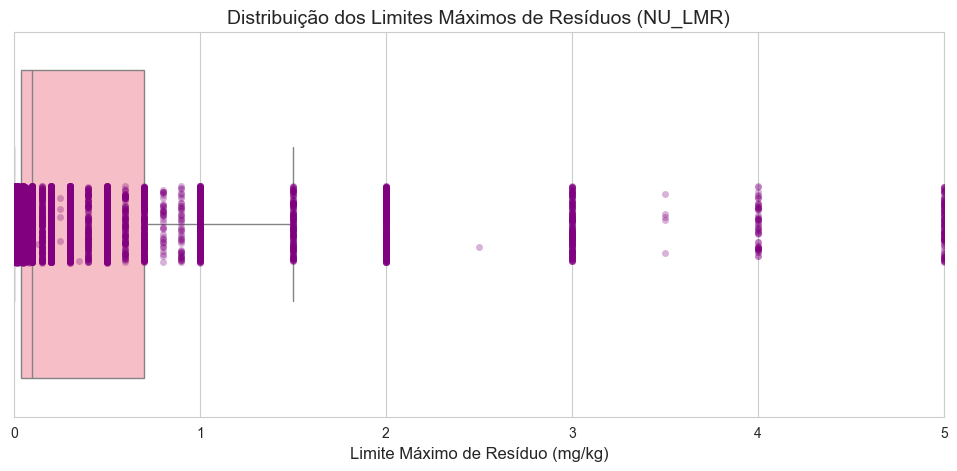

In [5]:
plt.figure(figsize=(12,5))

sns.boxplot(x=df["NU_LMR"], color="#FFB6C1", showfliers=False)  # showfliers=False esconde outliers extremos

sns.stripplot(x=df["NU_LMR"], color="purple", alpha=0.3, jitter=True)

plt.title("Distribuição dos Limites Máximos de Resíduos (NU_LMR)", fontsize=14)
plt.xlabel("Limite Máximo de Resíduo (mg/kg)", fontsize=12)
plt.xlim(0, 5)

plt.show()

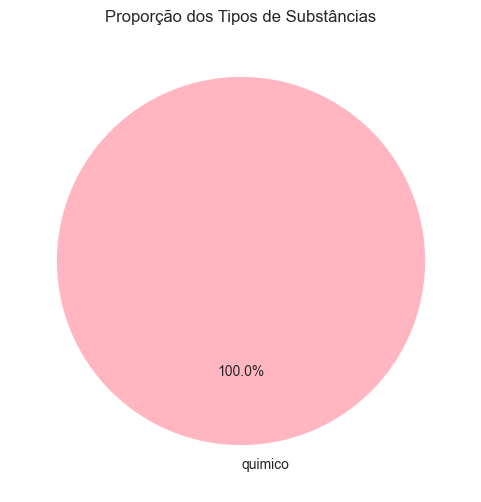

In [6]:
plt.figure(figsize=(6,6))
df['TP_SUBSTANCIA'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=["#FFB6C1","#FF69B4"],
    startangle=90
)
plt.title("Proporção dos Tipos de Substâncias")
plt.ylabel("")
plt.show()


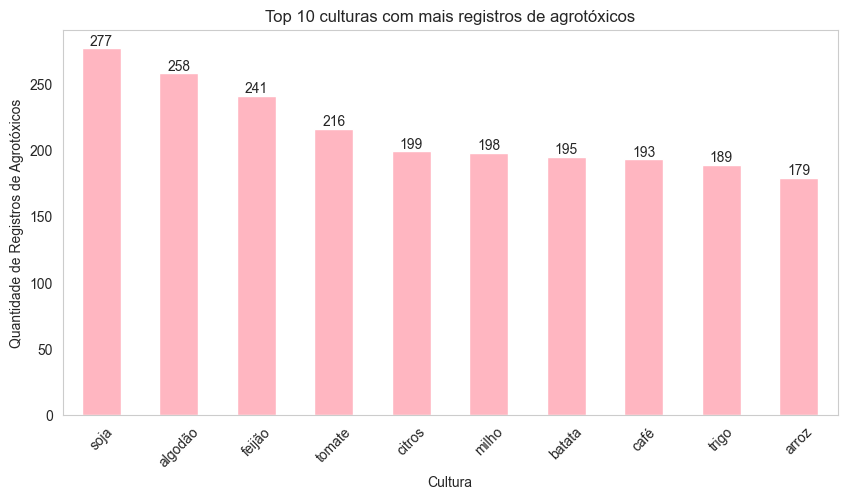

In [7]:
ax = df['NO_CULTURA'].value_counts().head(10).plot(kind='bar', color="#FFB6C1")
plt.title("Top 10 culturas com mais registros de agrotóxicos")
plt.xlabel("Cultura")
plt.ylabel("Quantidade de Registros de Agrotóxicos")
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.grid(False)
plt.show()

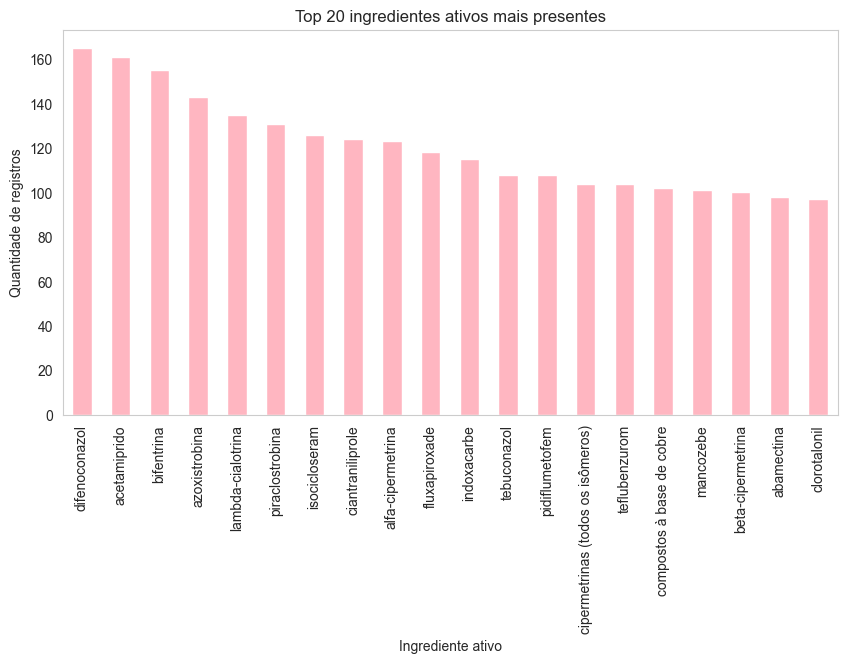

In [8]:
df['DS_INGREDIENTE_ATIVO'].value_counts().head(20).plot(kind='bar', color="#FFB6C1")
plt.title("Top 20 ingredientes ativos mais presentes")
plt.xlabel("Ingrediente ativo")
plt.ylabel("Quantidade de registros")
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

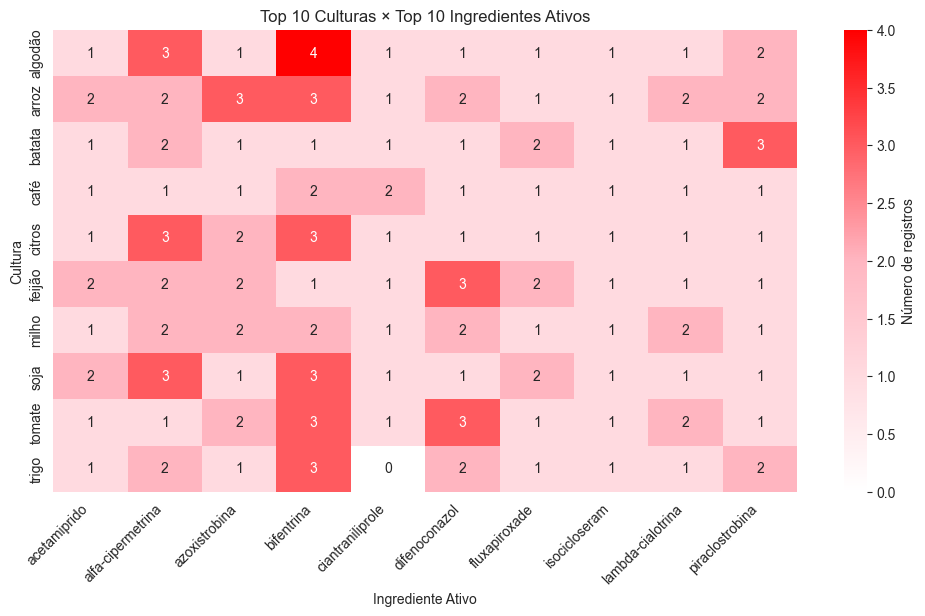

In [9]:
from matplotlib.colors import LinearSegmentedColormap

rosa_cmap = LinearSegmentedColormap.from_list("rosa", ["#ffffff", "#FFB6C1", "#ff0000"])

top_culturas = df['NO_CULTURA'].value_counts().head(10).index
top_ingredientes = df['DS_INGREDIENTE_ATIVO'].value_counts().head(10).index

df_filtrado = df[df['NO_CULTURA'].isin(top_culturas) & df['DS_INGREDIENTE_ATIVO'].isin(top_ingredientes)]

tabela_cult_ingred = pd.crosstab(df_filtrado['NO_CULTURA'], df_filtrado['DS_INGREDIENTE_ATIVO'])

plt.figure(figsize=(12,6))
sns.heatmap(tabela_cult_ingred, annot=True, fmt="d", cmap=rosa_cmap, cbar_kws={'label': 'Número de registros'})
plt.title("Top 10 Culturas × Top 10 Ingredientes Ativos")
plt.xlabel("Ingrediente Ativo")
plt.ylabel("Cultura")
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\Mônica\AppData\Local\Temp\ipykernel_11388\3723049815.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=status_counts.values, y=status_counts.index, palette=["#99fdb2", "#ff69b4"], orient='h')


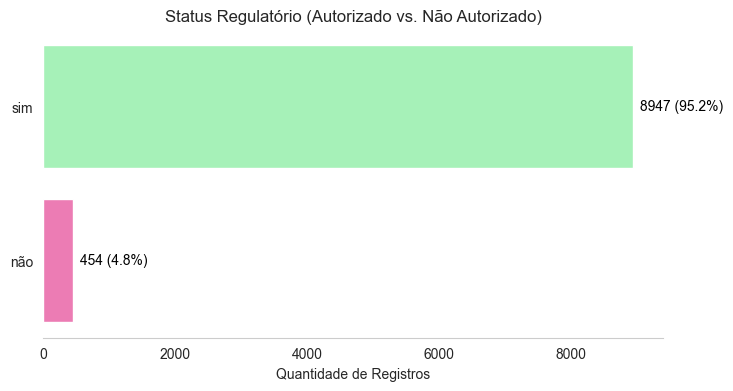

In [24]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

status_counts = df['ST_AUTORIZADO'].value_counts()

plt.figure(figsize=(8, 4))
ax = sns.barplot(x=status_counts.values, y=status_counts.index, palette=["#99fdb2", "#ff69b4"], orient='h')

total = len(df)
for i, v in enumerate(status_counts.values):
    percentage = f"({v/total:.1%})"
    ax.text(v + 100, i, f"{v} {percentage}", color='black', va='center')

plt.title("Status Regulatório (Autorizado vs. Não Autorizado)")
plt.xlabel("Quantidade de Registros")
plt.ylabel("")
plt.grid(False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()

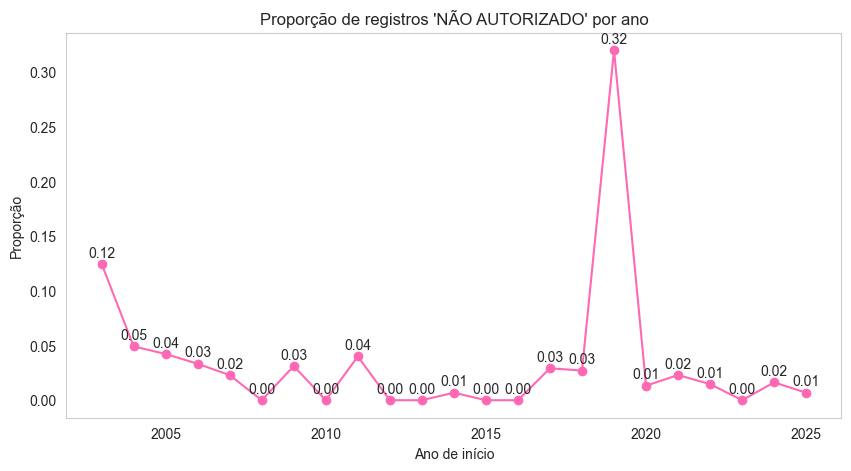

In [23]:
tabela_status = df.groupby('ano_inicio')['ST_AUTORIZADO'].value_counts().unstack().fillna(0)

tabela_status['PROPORCAO_NAO_AUTORIZADO'] = tabela_status['não'] / (
    tabela_status['sim'] + tabela_status['não']
)

ax = tabela_status['PROPORCAO_NAO_AUTORIZADO'].plot(marker='o', color="#ff69b4")
ax.set_title("Proporção de registros 'NÃO AUTORIZADO' por ano")
ax.set_xlabel("Ano de início")
ax.set_ylabel("Proporção")

for x, y in zip(tabela_status.index, tabela_status['PROPORCAO_NAO_AUTORIZADO']):
    ax.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.grid(False)
plt.show()


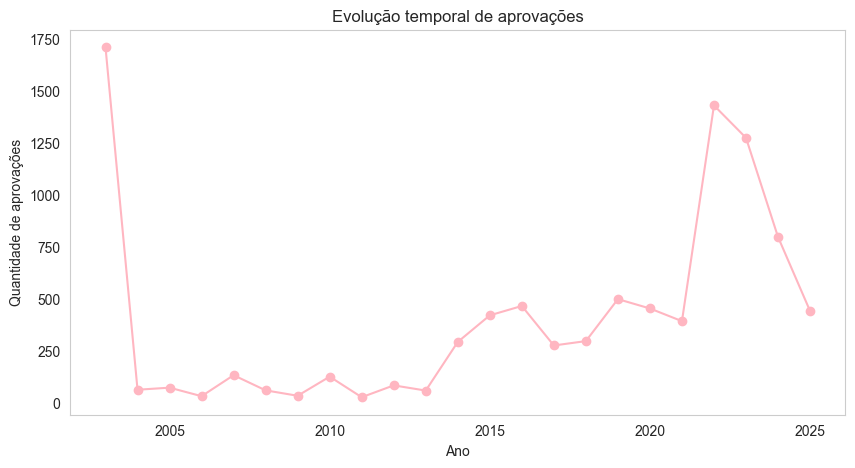

In [14]:
df['ano_inicio'] = pd.to_datetime(df['DT_INICIO_VIGENCIA'], errors='coerce').dt.year

df.groupby('ano_inicio').size().plot(kind='line', marker='o', color="#FFB6C1")
plt.title("Evolução temporal de aprovações")
plt.xlabel("Ano")
plt.ylabel("Quantidade de aprovações")
plt.grid(False)
plt.show()


# <p style="color:#FF69B4;"> ✨ Conclusão ✨ </p>

<p style="color:#FFB6C1;">Os resultados apontam que, embora haja grande diversidade de ingredientes ativos aplicados a diferentes culturas, 
há uma concentração em culturas de alto valor econômico. Além disso, a evolução temporal sugere que a aprovação de agrotóxicos 
aumentou em períodos recentes, enquanto o status regulatório revela que ainda há um número expressivo de substâncias 
não autorizadas, o que reforça a importância da reavaliação contínua para proteção da saúde humana e ambiental.</p>


<p style="color:#FFB6C1;">A análise confirma a hipótese top-down: culturas de grande importância econômica concentram a maioria das aprovações de agrotóxicos.  
A hipótese bottom-up também encontra indícios: substâncias mais recentes estão associadas a culturas específicas, sugerindo ajustes de mercado e regulação, o que reforçando a importância de tal regulação no contexto agrícola.<p/>
